In [23]:
import sys


sys.path.append('..')
from src.models.lstm_model import LSTMPredictionModel
from src.models.sarima_model import SarimaPredictionModel

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import logging
from src.data import load_data
from src import config
from src.preprocessing.dataset import generate_dataset

In [26]:
logging.basicConfig(level=logging.INFO)
model = SarimaPredictionModel()

INFO:SarimaPredictionModel:Init...


In [27]:
shift_value = 96
year = 2019
loc_x = 200
loc_y = 200
x_train, y_train = generate_dataset(
    load_data(data_path=config.DATA_FOLDER, year=year)[:, loc_x, loc_y], shift=shift_value
)
x_val, y_val = generate_dataset(
    load_data(data_path=config.DATA_FOLDER, year=year-1)[:, loc_x, loc_y], shift=shift_value
)
x_test, y_test = generate_dataset(
    load_data(data_path=config.DATA_FOLDER, year=year-2)[:, loc_x, loc_y], shift=shift_value
)

In [37]:
model.fit(
    X_train=x_train,
    y_train=y_train,
    X_val=x_val,
    y_val=y_val,
    epochs=20,
    batch_size=1024,
    plot_history=True
)

INFO:SarimaPredictionModel:The model is trained during the prediction at each step...


In [38]:
# Check if we can predict
x = x_test[0]
print(x.shape)

(40,)


In [39]:
x_test[0].shape
x_final = model.predict(x_test[0], how_many=x_test.shape[1]*10, verbose=True)

  0%|          | 0/360 [00:00<?, ?it/s]d:\Documents\irradiance\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\Documents\irradiance\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
  2%|▏         | 8/360 [00:01<00:56,  6.18it/s]d:\Documents\irradiance\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  6%|▌         | 20/360 [00:03<01:01,  5.56it/s]d:\Documents\irradiance\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to conv

In [ ]:
x_final.shape

(120,)

<Figure size 432x288 with 0 Axes>

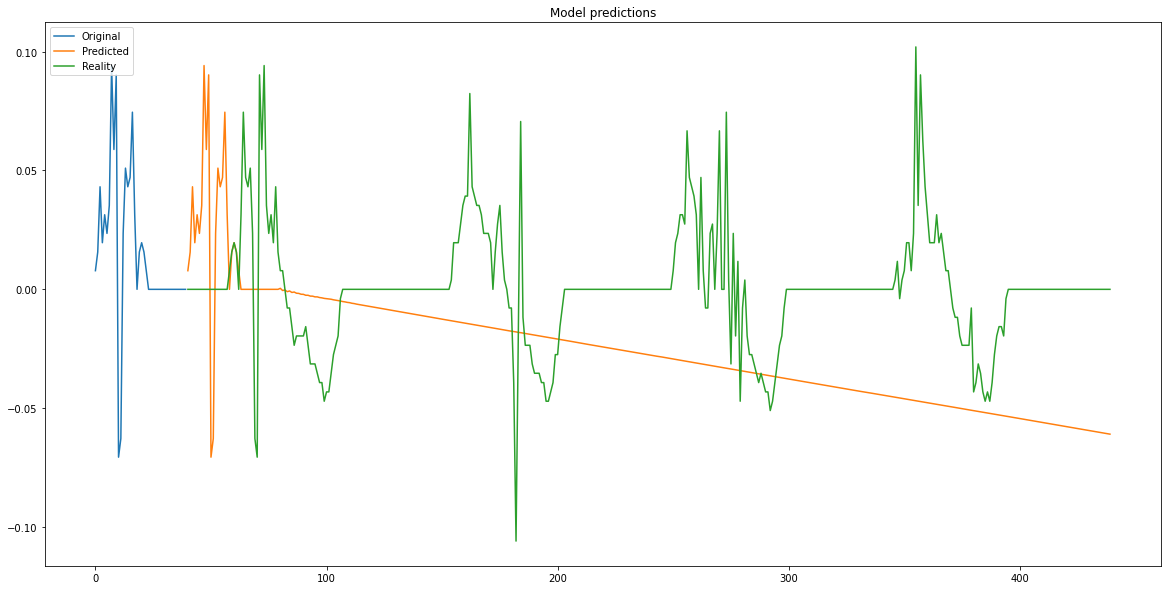

In [ ]:
import matplotlib.pyplot as plt

first_values = list(range(0, len(x_test[0])))
pred_values = list(range(len(x_test[0]), len(x_test[0]) + len(x_final)))

plt.clf()
plt.figure(figsize=(20,10))
plt.plot(first_values, x_test[0], label="Original")
plt.plot(pred_values, x_final, label="Predicted")
plt.plot(pred_values, y_test[: x_final.shape[0]], label="Reality")
plt.legend(loc="upper left")
plt.title("Model predictions")
plt.show();


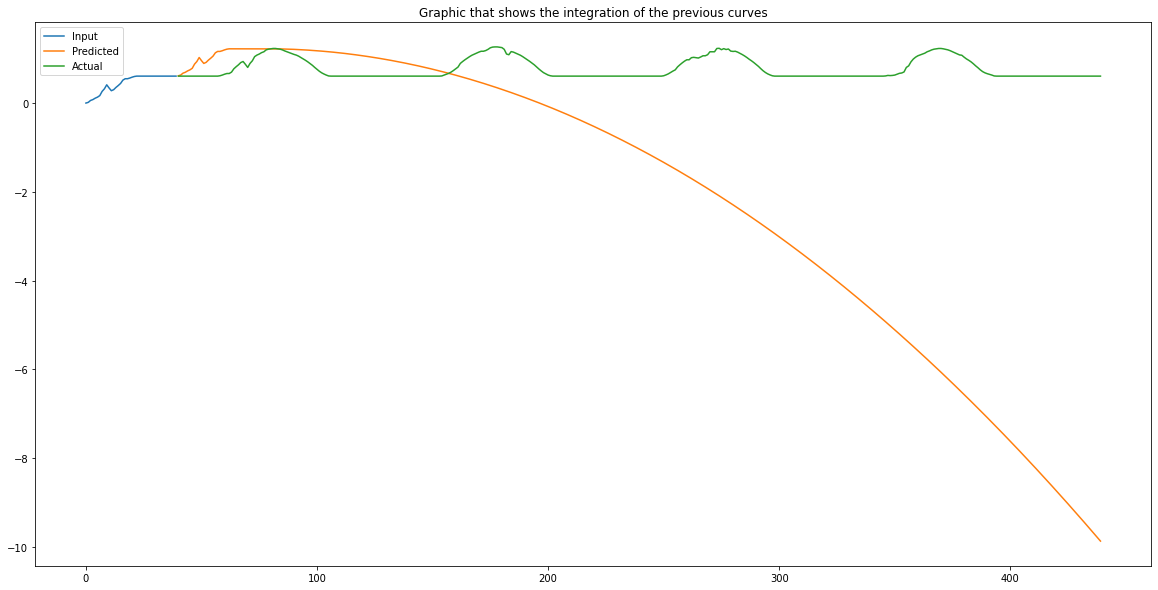

In [ ]:
import numpy as np

plt.figure(figsize=(20,10))
input_cumsum = np.cumsum(x_test[0])
plt.plot(first_values, input_cumsum, label="Input")
plt.plot(pred_values, input_cumsum[-1]+np.cumsum(x_final), label="Predicted")
plt.plot(pred_values, input_cumsum[-1]+np.cumsum(y_test[:x_final.shape[0]]), label="Actual")
plt.legend(loc="upper left")
plt.title("Graphic that shows the integration of the previous curves")
plt.show()
